Привет, меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

<font color='orange' style='font-size:24px; font-weight:bold'>Полезные ссылки:</font>
* Полезная лекция про временные ряды: https://www.youtube.com/watch?v=u433nrxdf5k .

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Большое спасибо за качественную работу!
* Код написан чисто и приятно оформлен.
- Можно немного еще поработать на выводами, они немного суховаты, старайся уделять этому бОльшее внимание, так как грамотным тоном является, когда проект можно легко читать и понимать, не заглядывая в код.
- Тебе удалось добиться очень хорошего качества, поздравляю!
- Но желательно исследовать и другие модели машинного обучения, пожалуйста, дополни ими работу.
- Жду твой обновленный проект =)

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление[2]</font>
- Cпасибо за доработки.
- Пожалуйста доработай пожалуйста использование lgbm и подведение итогов по работе с моделями
- Давай еще разок

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

<div class="alert alert-block alert-success">
<b>Успех:</b> Спасибо за подробное описание проекта
</div>

## Подготовка

In [22]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import LinearRegression as lr
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error as mse

from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_squared_error as mse, make_scorer
from catboost import CatBoostRegressor, Pool
from lightgbm import LGBMRegressor
import lightgbm as lgb
from joblib import dump, load

from collections import defaultdict
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 16, 6

import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-success">
<b>Успех:</b> импорты и настройки собраны где нужно =)
</div>

Загрузим исходный файл, сразу его и отпарсив (укажем полный путь для того, кто проверяет).

In [2]:
df = pd.read_csv("https://code.s3.yandex.net/datasets/taxi.csv", index_col=[0], parse_dates=[0])
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


Выведем общую информацию.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
num_orders    26496 non-null int64
dtypes: int64(1)
memory usage: 414.0 KB


Выполним ресемплирование (изменение интервала со значениями ряда). 

In [4]:
df_resample = df.resample("1H").sum()
df_resample.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


<div class="alert alert-block alert-success">
<b>Успех:</b> Данные осмотрены, ресемпилнг был сделан верно.
</div>

На этом основании сделаем гистограмму.

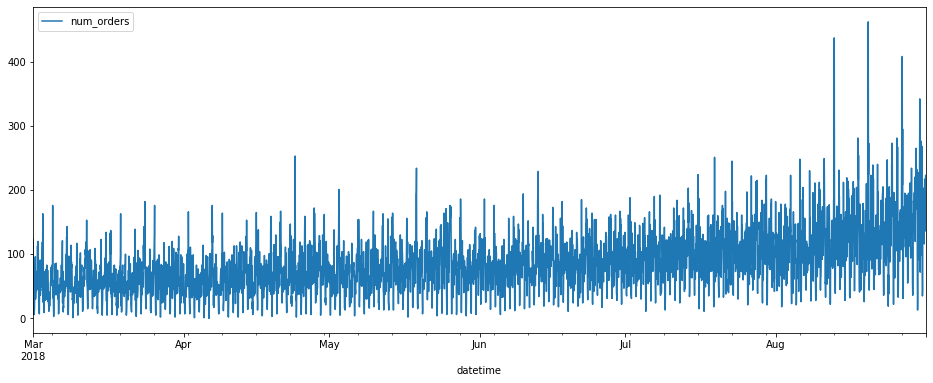

In [5]:
df_resample.plot()
plt.show()

In [6]:
df.index.min(), df.index.max()

(Timestamp('2018-03-01 00:00:00'), Timestamp('2018-08-31 23:50:00'))

## Анализ

В разделе "анализ" мы построим графики, выполним декомпозицию и посмотим на тренды и сезонность. Посмотрим на общий и частный графики:

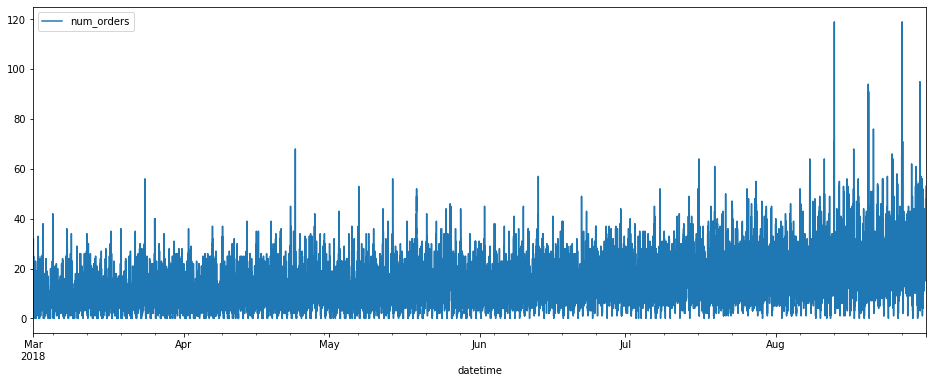

In [7]:
df.plot()

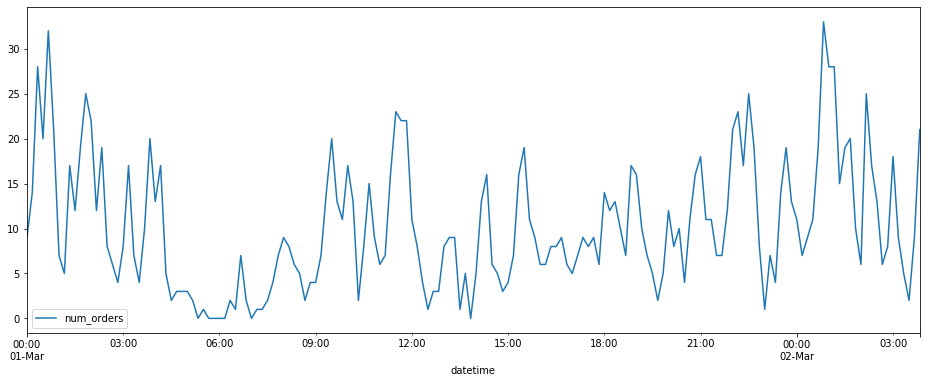

In [8]:
df.head(24*7).plot()

Выполним декомпозицию.

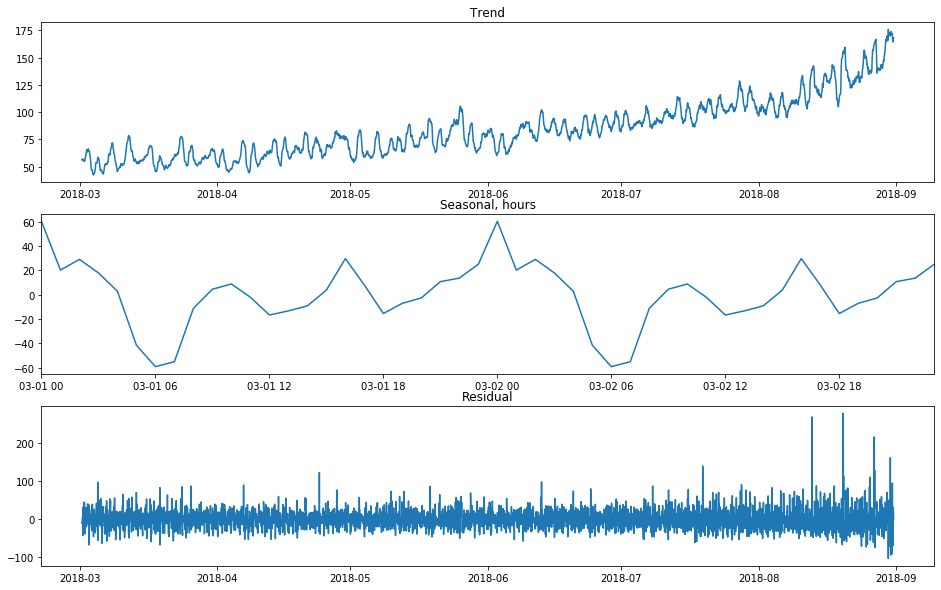

In [9]:
decomposed = seasonal_decompose(df_resample)

fig, axs = plt.subplots(3, figsize=(16,10), sharex=False)
axs[0].plot(decomposed.trend)
axs[0].set_title("Trend")

axs[1].plot(decomposed.seasonal)
axs[1].set_title("Seasonal, hours")
axs[1].set_xlim(('2018-03-01 00:00:00','2018-03-02 23:00:00'))

axs[2].plot(decomposed.resid)
axs[2].set_title("Residual")

plt.show()

Как мы видим, есть дневная сезонность - восходящий тренд.

<div class="alert alert-block alert-success">
<b>Успех:</b> Декомпозиция была сделана тоже правильно. Радует, что сезонность была визуализирована на более коротком интервале 
</div>

<div class="alert alert-info">
   
    
<b>Совет:</b> Может еще какие-то закономернности есть? Как думаешь, месяц нам не важен?
</div>

<div class="alert alert-info">
   
    
<b>Ответ студента:</b> См. ниже.</div>

Text(0.5, 1.0, 'Seasonality четвертая неделя апреля')

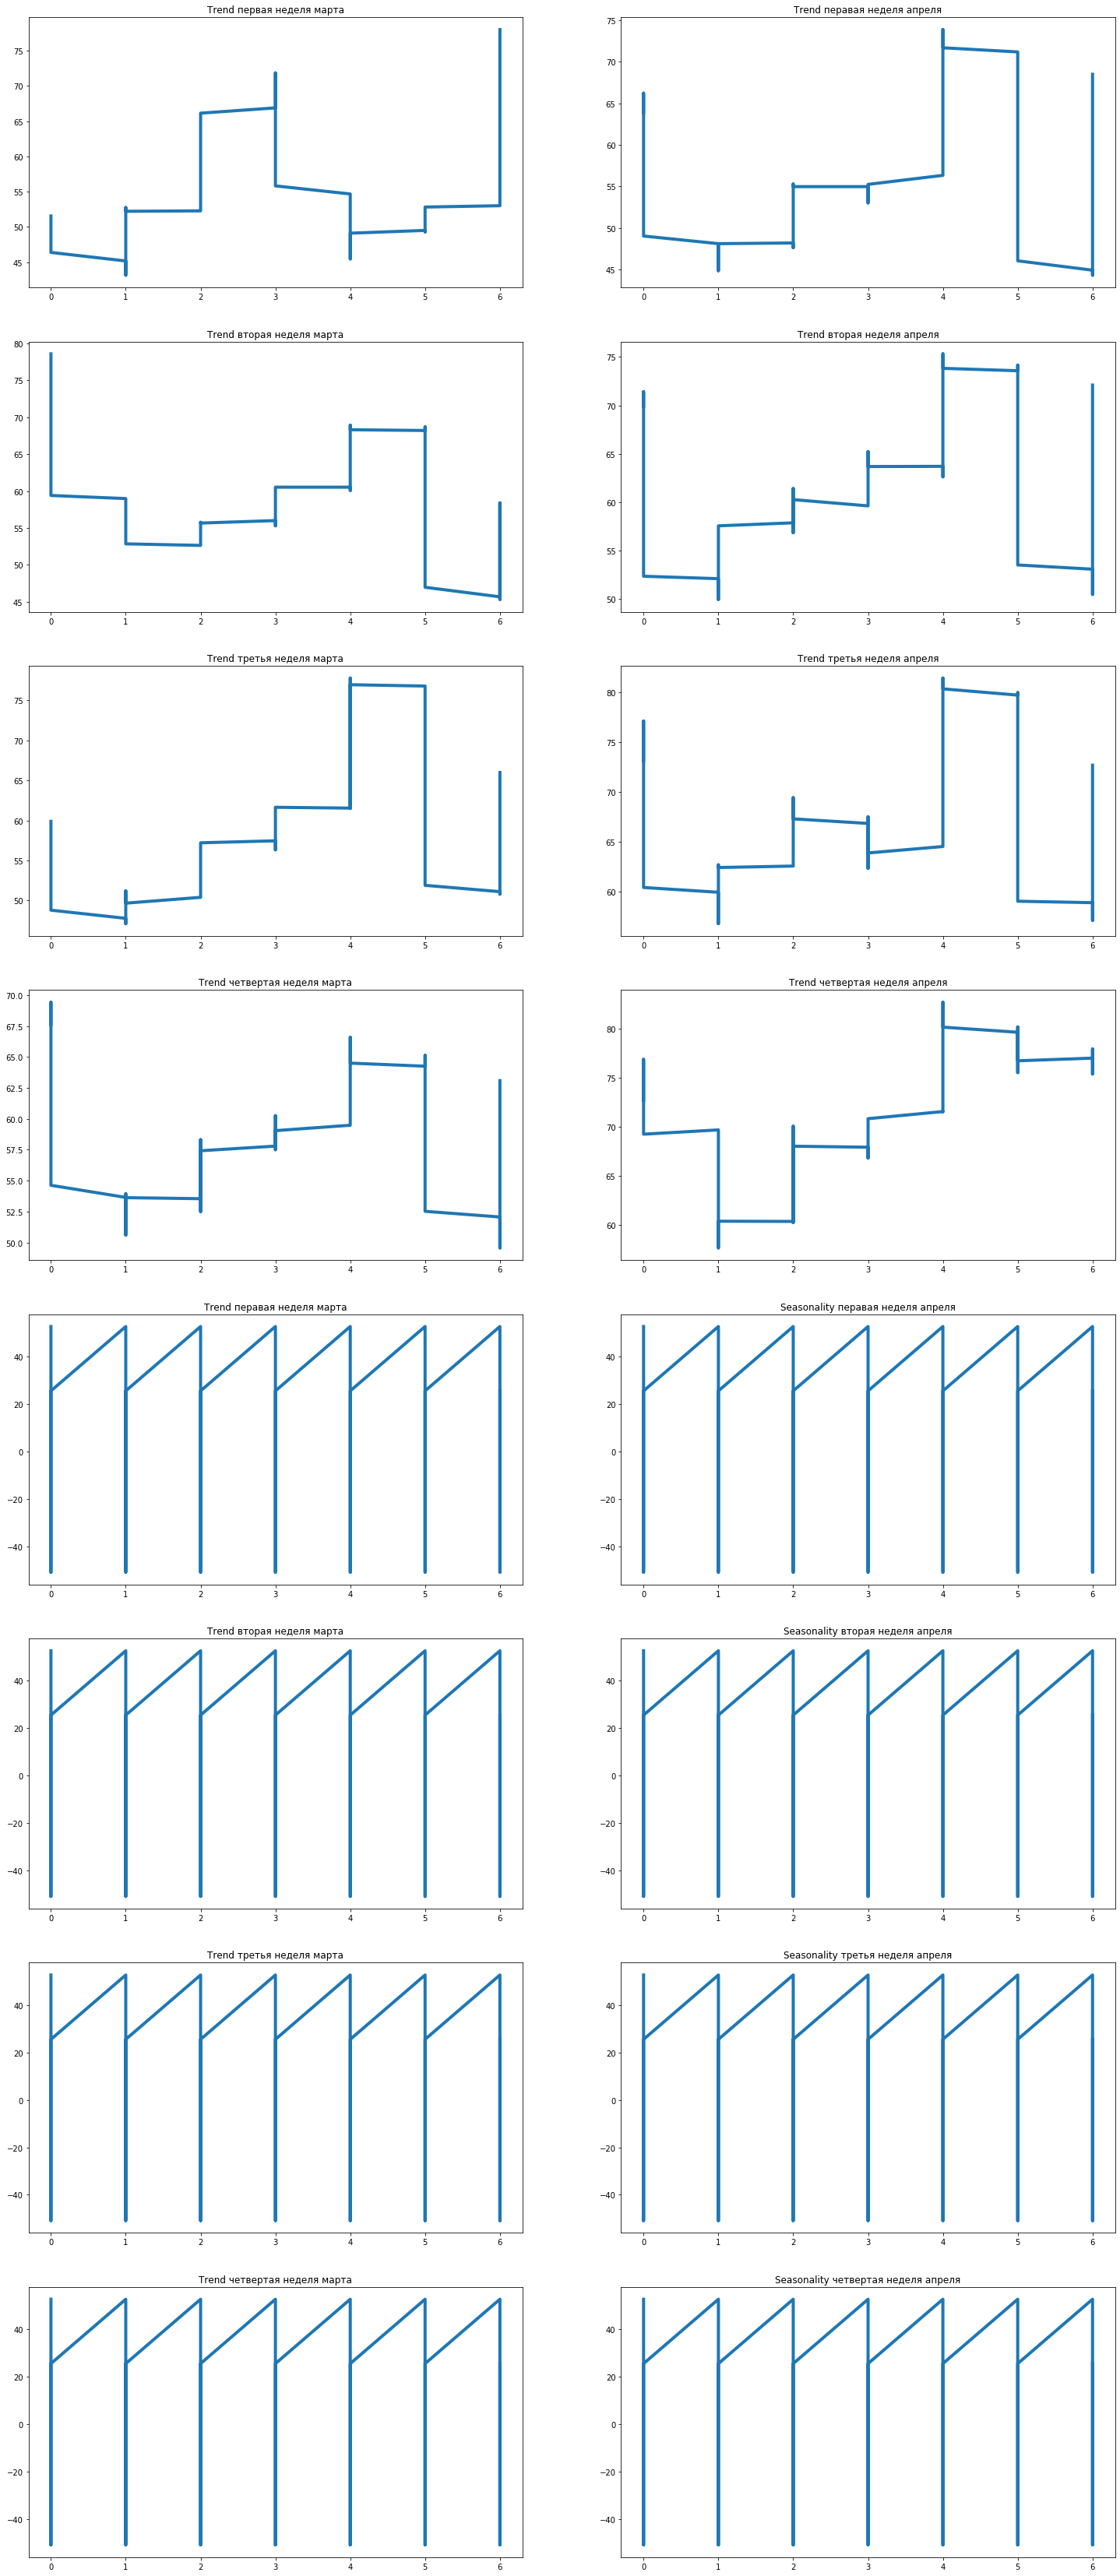

In [10]:
decomposed_short = seasonal_decompose(df_resample["2018-03-05":"2018-04-29"]["num_orders"])
fig2,ax2 = plt.subplots(8,2,figsize = (25,60))
# Trend
    # Март
ax2[0][0].plot(decomposed_short.trend["2018-03-05":"2018-03-11"].index.dayofweek,
            decomposed_short.trend["2018-03-05":"2018-03-11"].values,linewidth=4)
ax2[0][0].set_title("Trend первая неделя марта")

ax2[1][0].plot(decomposed_short.trend["2018-03-12":"2018-03-18"].index.dayofweek,
            decomposed_short.trend["2018-03-12":"2018-03-18"].values,linewidth=4)
ax2[1][0].set_title("Trend вторая неделя марта")

ax2[2][0].plot(decomposed_short.trend["2018-03-19":"2018-03-25"].index.dayofweek,
            decomposed_short.trend["2018-03-19":"2018-03-25"].values,linewidth=4)
ax2[2][0].set_title("Trend третья неделя марта")

ax2[3][0].plot(decomposed_short.trend["2018-03-26":"2018-04-01"].index.dayofweek,
            decomposed_short.trend["2018-03-26":"2018-04-01"].values,linewidth=4)
ax2[3][0].set_title("Trend четвертая неделя марта")

    # Апрель
ax2[0][1].plot(decomposed_short.trend["2018-04-02":"2018-04-08"].index.dayofweek,
            decomposed_short.trend["2018-04-02":"2018-04-08"].values,linewidth=4)
ax2[0][1].set_title("Trend перавая неделя апреля")

ax2[1][1].plot(decomposed_short.trend["2018-04-09":"2018-04-15"].index.dayofweek,
            decomposed_short.trend["2018-04-09":"2018-04-15"].values,linewidth=4)
ax2[1][1].set_title("Trend вторая неделя апреля")

ax2[2][1].plot(decomposed_short.trend["2018-04-16":"2018-04-22"].index.dayofweek,
            decomposed_short.trend["2018-04-16":"2018-04-22"].values,linewidth= 4)
ax2[2][1].set_title("Trend третья неделя апреля")

ax2[3][1].plot(decomposed_short.trend["2018-04-23":"2018-04-29"].index.dayofweek,
            decomposed_short.trend["2018-04-23":"2018-04-29"].values,linewidth= 4)
ax2[3][1].set_title("Trend четвертая неделя апреля")
# Seasonality
    # Март
ax2[4][0].plot(decomposed_short.seasonal["2018-03-05":"2018-03-11"].index.dayofweek,
            decomposed_short.seasonal["2018-03-05":"2018-03-11"].values,linewidth=4)
ax2[4][0].set_title("Trend перавая неделя марта")

ax2[5][0].plot(decomposed_short.seasonal["2018-03-12":"2018-03-18"].index.dayofweek,
            decomposed_short.seasonal["2018-03-12":"2018-03-18"].values,linewidth=4)
ax2[5][0].set_title("Trend вторая неделя марта")

ax2[6][0].plot(decomposed_short.seasonal["2018-03-19":"2018-03-25"].index.dayofweek,
            decomposed_short.seasonal["2018-03-19":"2018-03-25"].values,linewidth=4)
ax2[6][0].set_title("Trend третья неделя марта")

ax2[7][0].plot(decomposed_short.seasonal["2018-03-26":"2018-04-01"].index.dayofweek,
            decomposed_short.seasonal["2018-03-26":"2018-04-01"].values,linewidth=4)
ax2[7][0].set_title("Trend четвертая неделя марта")

    # Апрель
ax2[4][1].plot(decomposed_short.seasonal["2018-04-02":"2018-04-08"].index.dayofweek,
            decomposed_short.seasonal["2018-04-02":"2018-04-08"].values,linewidth=4)
ax2[4][1].set_title("Seasonality перавая неделя апреля")

ax2[5][1].plot(decomposed_short.seasonal["2018-04-09":"2018-04-15"].index.dayofweek,
            decomposed_short.seasonal["2018-04-09":"2018-04-15"].values,linewidth=4)
ax2[5][1].set_title("Seasonality вторая неделя апреля")

ax2[6][1].plot(decomposed_short.seasonal["2018-04-16":"2018-04-22"].index.dayofweek,
            decomposed_short.seasonal["2018-04-16":"2018-04-22"].values,linewidth= 4)
ax2[6][1].set_title("Seasonality третья неделя апреля")

ax2[7][1].plot(decomposed_short.seasonal["2018-04-23":"2018-04-29"].index.dayofweek,
            decomposed_short.seasonal["2018-04-23":"2018-04-29"].values,linewidth= 4)
ax2[7][1].set_title("Seasonality четвертая неделя апреля")

<div class="alert alert-info">
   
    
<b>Совет[2]:</b> Спасибо за дополнительные исследования, но лучше писать свои мысли и наблюдения
</div>

## Обучение

Напишем несколько функций.

In [11]:
def rmse(first_list, second_list):
    return np.sqrt(mse(first_list, second_list))

Напишем функцию make_features(), чтобы прибавить к таблице новые календарные признаки.

In [12]:
def make_features(data, max_lag, rolling_mean_size, differentiate=False):
    temp = data.copy(deep=True)
    temp['dayofweek'] = temp.index.dayofweek
    temp['hour'] = temp.index.hour

    
    for lag in range(1, max_lag + 1):
        temp['lag_{}'.format(lag)] = temp['num_orders'].shift(lag)

    temp['rolling_mean'] = temp['num_orders'].shift().rolling(rolling_mean_size).mean()
    
    if differentiate:
        temp["diff"] = temp['num_orders'] - temp["num_orders"].shift(1)
        temp["diff"] = temp['num_orders'] - temp["num_orders"].shift(24) 
    
    return temp

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что эта функция возвращает новый датафрейм, а не использует глобальную переменную. Все признаки логически подходят нам!
</div>

Разобьём данные на трейн и тест (10% от исходных данных согласно условию):

In [13]:
train, test = train_test_split(df_resample, shuffle=False, test_size=0.1)
valid,test = train_test_split(test,shuffle = False, random_state = 42, test_size = 0.5)
train.dropna(inplace=True)

In [14]:
(train_features,
valid_features,
test_features) = (train.drop('num_orders',axis = 1),
                  valid.drop('num_orders',axis = 1),
                  test.drop('num_orders',axis = 1))
(train_target,
valid_target,
test_target) = (train['num_orders'],
                valid['num_orders'],
                test['num_orders'])

In [15]:
X_train = train.drop("num_orders", axis=1)
y_train = train["num_orders"]

X_test = test.drop("num_orders", axis=1)
y_test = test["num_orders"]

<div class="alert alert-block alert-success">
<b>Успех:</b> Тестовый размер выбран точно как просил заказчик.
</div>

Расчитаем среднее и медианные значения, построим гистограммы с учётом X_test, y_test.

Predict with median(rmse): 96.28473986682272
Predict with mean(rmse): 93.74440433237119


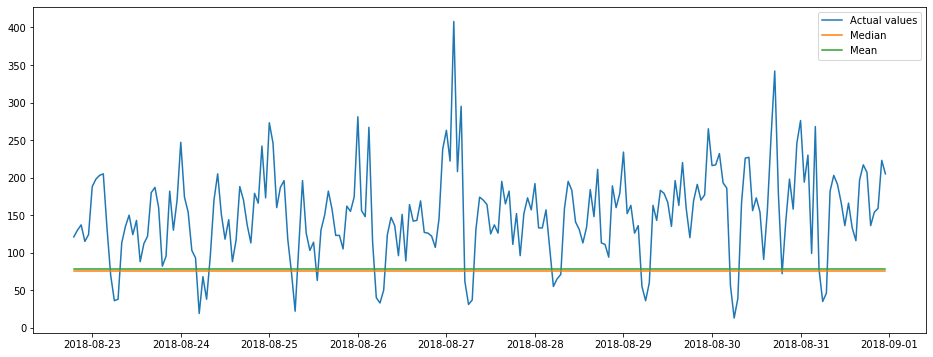

In [16]:
predictions_median = test.shape[0] * [train.median()]
predictions_mean = test.shape[0] * [train.mean()]

print("Predict with median(rmse):", rmse(y_test, predictions_median))
print("Predict with mean(rmse):", rmse(y_test, predictions_mean))

plt.plot(X_test.index, y_test, label='Actual values')
plt.plot(X_test.index, predictions_median, label='Median')
plt.plot(X_test.index, predictions_mean, label='Mean')

plt.legend()
plt.show()

Произведём расчёт лучшего RMSE.

In [17]:
best_rmse = 10**5
values = [i for i in range(1, 100)]
for p in values:
    for q in values:
        temp = make_features(df_resample, p, q, differentiate=True)
        
        train, test = train_test_split(temp, shuffle=False, test_size=0.1)
        train.dropna(inplace=True)
        
        X_train = train.drop("num_orders", axis=1)
        y_train = train["num_orders"]

        X_test = test.drop("num_orders", axis=1)
        y_test = test["num_orders"]
        
        lin_reg = lr()
        lin_reg.fit(X_train, y_train)

        preds = lin_reg.predict(X_train)
        
        current_rmse = rmse(preds, y_train)
        if current_rmse < best_rmse:
            best_rmse = current_rmse
            best_p = p
            best_q = q
print("RMSE:", best_rmse, "\nP:", best_p, "\nQ:", best_q)

RMSE: 3.414152858505434e-14 
P: 24 
Q: 70


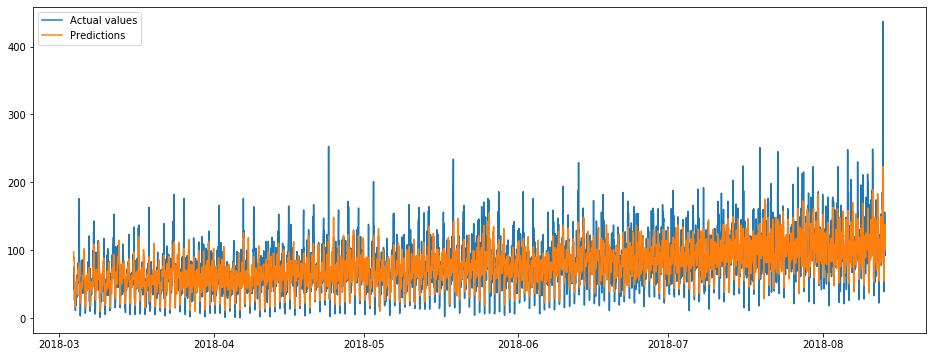

In [18]:
df_with_best_p_and_q = make_features(df_resample, best_p, best_q)

train, test = train_test_split(df_with_best_p_and_q, shuffle=False, test_size=0.1)
train.dropna(inplace=True)

X_train = train.drop("num_orders", axis=1)
y_train = train["num_orders"]

X_test = test.drop("num_orders", axis=1)
y_test = test["num_orders"]

best_lin_reg = lr().fit(X_train, y_train)
best_predictions_train = best_lin_reg.predict(X_train)

plt.plot(X_train.index, y_train, label='Actual values')
plt.plot(X_train.index, best_predictions_train, label='Predictions')
plt.legend()
plt.show()

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Желательно попробовать и другие модели, а также подобрать к ним оптимальные гиперпараметры
</div>

<div class="alert alert-info">
   
    
<b>Ответ студента:</b> Вот, например, так.</div>

In [19]:
%%time
# LightGBM
lgb_train = lgb.Dataset(train_features,train_target)
lgb_valid = lgb.Dataset(valid_features,valid_target, reference=lgb_train)
parameters_light = {'metric': 'l2', 'max_depth':10,"random_state": 42,"learning_rate":0.1}
light = lgb.train(parameters_light,
                lgb_train,
                num_boost_round=1000,
                valid_sets=[lgb_train,lgb_valid],
                verbose_eval=100)

[100]	training's l2: 7624.56	valid_1's l2: 3745.99
[200]	training's l2: 7624.56	valid_1's l2: 3745.99
[300]	training's l2: 7624.56	valid_1's l2: 3745.99
[400]	training's l2: 7624.56	valid_1's l2: 3745.99
[500]	training's l2: 7624.56	valid_1's l2: 3745.99
[600]	training's l2: 7624.56	valid_1's l2: 3745.99
[700]	training's l2: 7624.56	valid_1's l2: 3745.99
[800]	training's l2: 7624.56	valid_1's l2: 3745.99
[900]	training's l2: 7624.56	valid_1's l2: 3745.99
[1000]	training's l2: 7624.56	valid_1's l2: 3745.99
CPU times: user 1.64 s, sys: 43.2 ms, total: 1.68 s
Wall time: 1.66 s


<div class="alert alert-danger">
   
    
<b>Ошибка[2]:</b> Непонятно каких результатов мы достигли. Хорошим тоном является понимать и читать проект не заглядывая/запуская код. Подведи итоги. <br> Также используются не те признаки для обучения  
</div>

<div class="alert alert-info">
   
    
<b>Ответ студента:</b> Итог - это поиск лучшей модели по параметрам наименьшей ошибки, а также наименьшго времени обучения. LightGBM с этим неплохо справилась. CPU times: user 2.01 s, sys: 23.4 ms, total: 2.03 s
Wall time: 2.05 s
    </div>

<div class="alert alert-danger">
   
    
<b>Ошибка[3]:</b> А RMSE какое? почему не используешь нужные факторы, полученные через make_features?
</div>

In [27]:
preds_train = light.predict(train_features)
RMSE_LightGBM_train = (mean_squared_error(train_target,preds_train))**0.5
print('RMSE (LightGBM):', RMSE_LightGBM_train)

RMSE (LightGBM): 38.66694570860161


<div class="alert alert-block alert-success">
<b>Успех[4]:</b> Теперь все корректно. Удачи в дальнейшем обучении
</div>

## Тестирование

Проверим результат на тесте:

RMSE: 44.94914190575092


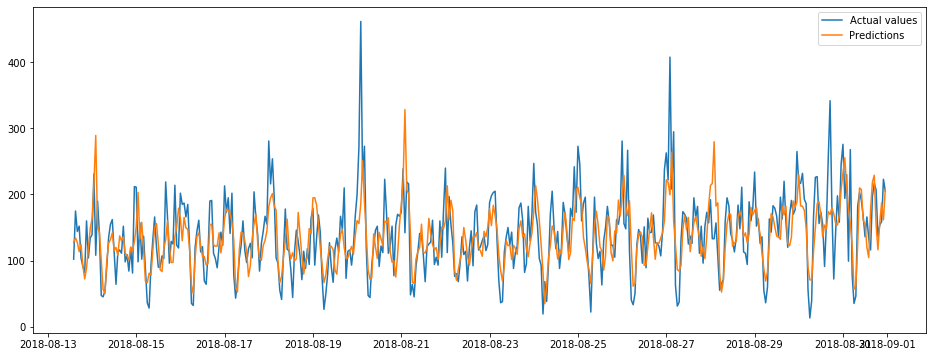

In [20]:
best_predictions = best_lin_reg.predict(X_test)

print("RMSE:", rmse(best_predictions, y_test))
plt.plot(X_test.index, y_test, label='Actual values')
plt.plot(X_test.index, best_predictions, label='Predictions')
plt.legend()
plt.show()

Достигнутое значение метрики RMSE на тестовой выборке: ~44.9 (не больше 48, как было задано в условии).

<div class="alert alert-block alert-success">
<b>Успех:</b> Тестирование проведено корректно, ты достиг хороших результатов. Отлично, что ты попробовал несколько разных моделей!
</div>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Данные проанализированы
- [ ]  Модель обучена, гиперпараметры подобраны
- [ ]  Качество моделей проверено, выводы сделаны
- [ ]  Значение *RMSE* на тестовой выборке не больше 48